# 1 Author

**Student Name**: Hesong Wang  
**Student ID**:  210977062



# 2 Problem formulation

### For Supervised Learning on the Genki4k Dataset

#### 1. Machine Learning Problem: Smile Recognition

- **Objective**: Develop a machine learning model to accurately identify whether a person in an image is smiling. This involves classifying each image into one of two categories: 'smiling' or 'not smiling'.

- **Data Characteristics**: The Genki4k dataset contains thousands of facial images, each annotated with smile/non-smile labels. These images are varied in terms of lighting, pose, facial features, and backgrounds, making the task challenging yet closer to real-world scenarios.

- **Approach**: Use supervised learning techniques, exploring deep learning approaches like CNNs, which are well-suited for image classification tasks.

- **Something Interesting About This Task**: Smile recognition has a wide array of applications in fields such as human-computer interaction, psychology, and marketing. For instance, in human-computer interaction, it can enhance user experience by adapting responses based on user emotions. In marketing, analyzing customer expressions can provide insights into their reactions to products or services.

#### 2. Machine Learning Problem: Pose Estimation

- **Objective**: Develop a model to predict the head pose (orientation) of a person in an image. This could involve estimating angles or classifying the pose into several predefined categories (e.g., looking left, right, up, down, or straight).

- **Data Characteristics**: Similar to smile recognition, the dataset's diversity in terms of facial orientations and environmental conditions adds complexity to the pose prediction task.

- **Approach**: This problem can be approached either as a classification task (categorizing into discrete pose categories) or as a regression task (predicting continuous pose angles). Techniques can range from geometric methods to learning-based approaches like DNNs or CNNs, which can leverage facial landmarks or direct image input for pose estimation.

- **Something Interesting About This Task**: Pose prediction has significant implications in fields like augmented reality, driver monitoring, and robotics. For example, in augmented reality, understanding the user's head orientation can help in rendering virtual objects more realistically. In driver monitoring systems, pose prediction can be crucial for detecting driver attentiveness.


# 3 Machine Learning pipeline

### My ML Pipeline: 

#### 1. **Input**:
   - **Data**: The Genki4K dataset, consisting of facial images.
   - **Pre-trained Models**: Pre-trained neural network models like ResNet and VGGNet.

#### 2. **Data Preprocessing**:
   - **Transformation**: Images are transformed using the `transforms.Compose` method. This includes converting image data to a PIL Image format, resizing images to 224x224 pixels, and converting them to a tensor.
   - **Purpose**: To standardize the input data format and size for effective model training and inference.

#### 3. **Training**:
   - **Model Initialization**: Two models are initialized using the MobileNet V2 architecture. One for smile detection (`model_sml`) and another for pose estimation (`model_pose`).
   - **Hyperparameters**: Defined learning rate, batch size, number of epochs, and learning rate decay epochs.
   - **Loss Functions**: Cross-Entropy Loss for smile detection and Mean Squared Error Loss for pose estimation.
   - **Optimizer**: Adam optimizer with defined learning rate.
   - **Purpose**: To train the models on the preprocessed data for specific tasks (smile detection and pose estimation).

#### 4. **Evaluation**:
   - **Validation**: The models are evaluated on a validation set to assess their performance.
   - **Accuracy and Loss Measurement**: Accuracy and loss are calculated to gauge the effectiveness of the models.
   - **Early Stopping**: Implemented to prevent overfitting if the validation loss does not improve over a certain number of epochs.
   - **Purpose**: To pick the best model for the specific task.

#### 5. **Model Output**:
   - **Outputs**: Predictions regarding whether a person is smiling (from `model_sml`) and their pose (from `model_pose`).

#### 6. **Visualization**:
   - **Data Visualization**: Plotting the training and validation losses over epochs to visualize the learning process.
   - **Purpose**: To provide insights into the model training process and identify areas for improvement.

Based on the provided code and the context of the machine learning tasks (smile detection and pose estimation), here's a structured intermediate data flow for the pipeline:

### **Intermediate Data Flow**:
1. **Raw Images** are inputted into the system.
2. These images undergo **Preprocessing** (conversion to PIL format, resizing, and tensor conversion).
3. The preprocessed images are then used to **Train** two separate models for smile detection and pose estimation.
4. The models are **Evaluated** on a validation set, where their performance is assessed.
5. Finally, the trained models make **Predictions** on new, unseen images, outputting results like smile/no-smile and pose estimates.

This pipeline encompasses the key stages from initial data input to model training, evaluation, and output, with a focus on image processing tasks involving smile detection and pose estimation.


# 4 Transformation stage

### Image Transformation
1. **Input**: Raw image data.
2. **Transformations**:
   - Converts images to PIL format.
   - Resizes to 224x224 pixels.
   - Converts to PyTorch tensors.
3. **Output**: Standardized image tensors for model input.
4. **Purpose**: Ensures compatibility with neural networks and standardizes input size for batch processing.

In [200]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Lambda(lambda x: Image.fromarray(x)),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# 5 Modelling

1. **Model for Smile Detection (`model_sml`)**:
   - **Architecture**: MobileNet V2, a lightweight deep neural network known for efficiency with minimal loss of accuracy, suitable for mobile and edge devices.
   - **Modification**: The classifier layer is modified to output 2 classes, presumably to distinguish between 'smile' and 'no smile'.
   - **Optimizer**: Adam optimizer with a learning rate of 0.0001.
   - **Loss Function**: CrossEntropyLoss, common for classification tasks.
   - **Reason for Choice**: MobileNet V2's efficiency and effectiveness in image classification tasks make it suitable for real-time smile detection.

2. **Model for Pose Estimation (`model_pose`)**:
   - **Architecture**: MobileNet V2, chosen for its balance between performance and computational efficiency.
   - **Modification**: The classifier layer is adapted to output 3 classes, likely for pose estimation in three dimensions.
   - **Optimizer**: Adam optimizer with the same learning rate as `model_sml`.
   - **Loss Function**: Mean Squared Error Loss (MSELoss), typical for regression tasks like pose estimation.
   - **Reason for Choice**: The lightweight nature of MobileNet V2 facilitates fast and efficient pose estimation, which is crucial in real-time applications.

### Summary and Considerations:
Both models are set to run on a GPU if available (`cuda`), which significantly speeds up training and inference processes. The choice of MobileNet V2 for both tasks reflects a focus on efficiency and speed.

In [201]:
# Imports
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device: ', device)

# Default Hyperparameters
learning_rate = 0.0001
batch_size = 64
num_epochs = 16

lr_dacay_epochs = 4
criterion_smile = nn.CrossEntropyLoss()

criterion_pose = nn.MSELoss()
criterion_pose_ = nn.MSELoss(reduction='none')

# Define model
# model = torchvision.models.resnet18(pretrained = True, num_classes=1000)
# model.fc = nn.Linear(model.fc.in_features, 2)
model_sml = torchvision.models.mobilenet_v2(pretrained = True)
model_sml.classifier[1] = nn.Linear(model_sml.classifier[1].in_features, 2)
model_sml.to(device)

model_pose = torchvision.models.mobilenet_v2(pretrained = True)
model_pose.classifier[1] = nn.Linear(model_pose.classifier[1].in_features, 3)
model_pose.to(device)

optimizer_sml = optim.Adam(model_sml.parameters(), lr=learning_rate)
optimizer_pose = optim.Adam(model_pose.parameters(), lr=learning_rate)


device:  cuda


/home/whs/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/whs/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# 6 Methodology

1. **Training and Validation Process**:
   - **Model Training**: The model is trained on a dataset (likely the previously mentioned custom dataset) using an optimizer and a loss function suitable for the task (smile detection or pose estimation).
   - **Model Validation**: Post-training, the model is validated on a separate set of data to assess its generalization capability and performance on unseen data.

2. **Performance Assessment Functions**:
   - **`check_accuracy`**:
     - **Purpose**: Evaluates the model's accuracy on a given dataset (either training or testing set).
     - **Process**: The model predicts the output for each input batch, and these predictions are compared against the true labels (`y`). The number of correct predictions is tallied to calculate the overall accuracy.
     - **Output**: Prints the total number of correct predictions and the calculated accuracy as a percentage.
     - **Use Case**: Particularly useful for classification tasks like smile detection.
   - **`check_loss`**:
     - **Purpose**: Assesses the model's performance in terms of loss on a given dataset.
     - **Process**: Instead of focusing on accuracy, this function calculates the loss for each batch using a loss function appropriate for regression tasks (like pose estimation).
     - **Output**: Prints the average loss over all batches in the dataset.
     - **Use Case**: Ideal for regression tasks or where precise numerical predictions are more informative than categorical accuracy.
   - **`plot_loss`**:
     - **Purpose**: Visualizes the training and validation losses over time.
     - **Process**: Plots the loss values across epochs for both training and validation phases.
     - **Output**: A graph that helps in visualizing the model's learning curve and identifying issues like overfitting or underfitting.
     - **Use Case**: Useful for monitoring and adjusting the training process.

3. **Overall Strategy**:
   - The models are iteratively trained and validated. The `check_accuracy` and `check_loss` functions provide insights into the model's performance at various stages of training.
   - The `plot_loss` function is crucial for visualizing the training process, allowing for adjustments in hyperparameters or training strategies based on the observed trends.
   - Combining these functions gives a holistic view of the model's performance, balancing between accuracy (for classification) and precision (for regression tasks). 

In summary, this approach ensures a thorough assessment of the models, aligning their performance metrics with the specific requirements of the tasks (smile detection and pose estimation) they are designed for.

In [202]:
import matplotlib.pyplot as plt
from tqdm import tqdm

train_loader = None

# Checking accuracy
def check_accuracy(loader, model):
    if loader == train_loader:
        print("Checking accutacy on training data: ")
    else:
        print("Checking accuracy on test data: ")

    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y, _ in tqdm(loader):
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            loss = criterion_smile(scores, y)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f'Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100}')

def check_loss(loader, model):
    if loader == train_loader:
        print("Checking loss on training data: ")
    else:
        print("Checking loss on test data: ")

    loss_total = 0
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, _, y in tqdm(loader):
            x = x.to(device)
            y = y.to(device)

            predictions = model(x)
            loss = criterion_pose(predictions, y)
            # loss = criterion_(predictions, y).sum(dim=1)

            # num_correct += (loss < 0.05).sum().item()
            loss_total += loss
            num_samples += x.size(0)

        print(f'Reached a average loss of {float(loss_total) / float(num_samples) * 100}')

def plot_loss(train_losses, vali_losses):  
    # Plotting the training and validation loss
    plt.figure(figsize=(12, 8))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(vali_losses, label='Validation Loss')
    plt.title('Training vs. Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    plt.savefig('/home/whs/smile_loss.png')

# 7 Dataset

### Dataset Overview:

- **Dataset**: Genki4k
- **Content**: This dataset seems to consist of images along with two types of labels - one for smile detection (`label_sml`) and another for pose estimation (`label_pose`).
- **Purpose**: The dataset is tailored for supervised learning tasks, particularly for training and validating models in smile detection and pose estimation.

### Preprocessing Steps:

1. **Image Loading and Label Extraction**:
   - The `Genki4kDataset` class reads image files from a directory, with their paths constructed using indices. For each image, corresponding smile and pose labels are extracted from a label file.
   - Images are read using `io.imread` from the `skimage` library and labels are parsed from a CSV file using `pandas`.

2. **Handling Image Formats**:
   - If an image is in grayscale (2D array), it is converted into a 3-channel RGB format by repeating the grayscale values. This ensures uniformity in input format for subsequent processing.

3. **Image Transformations**:
   - A `transform` parameter allows for the application of preprocessing steps to each image. These steps likely include resizing the images to a standard size (e.g., 224x224 pixels), normalizing pixel values, and converting them to PyTorch tensors.
   - The exact transformations are not specified in the class but can be customized based on the model requirements.

4. **Dataset Loading**:
   - The dataset is loaded and managed using PyTorch's `Dataset` class, which provides an efficient way to iterate over the data in minibatches during the feature extraction process.
   
This customized dataset setup is crucial for feeding the correctly preprocessed data into the neural network models for the tasks of smile detection and pose estimation, ensuring consistency and efficiency in the training and validation processes.

In [203]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io
import numpy as np
import os

class Genki4kDataset(Dataset):
    def __init__(self, data_dir, label_file, transform=None):
        self.data_dir = data_dir
        self.labels = pd.read_csv(label_file, header=None)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        image_path = os.path.join(self.data_dir, 'file' + "{:04d}".format(index+1) + '.jpg')

        image = io.imread(image_path)
        label_sml = int(self.labels.iloc[index, 0].split()[0])
        label_pose = tuple(float(x) for x in self.labels.iloc[index, 0].split()[1:4])
        label_pose = torch.tensor(label_pose)
        # print(label_pose.shape)

        if image.ndim == 2:
            image = np.repeat(image[:, :, np.newaxis], 3, axis=2)

        if self.transform:
            image = self.transform(image)

        return (image, label_sml, label_pose)

# 8 Results

### We conducted two primary experiments:

1. **Smile Detection Task Training**
2. **Pose Estimation Task Training**

The models used in both tasks are pre-trained, so this experiment adopts the idea of transfer learning.

### Implementation Details:

1. **Smile Detection Model**:
    - Training Epochs: 12
    - Learning Rate: Initialized to **0.0005**, decays by **0.1** every **2** epochs
    - Optimizer: Adam
    - Early Stop Patience: 8

2. **Pose Estimation Model**:
    - Training Epoch: 30
    - Learning Rate: Initialized to **0.001**, decays by **0.1** every **10** epochs
    - Optimizer: Adam
    - Early Stop Patience: 8


### First we **load the dataset**: 

In [204]:
from torch.utils.data import DataLoader
from PIL import Image

# Load data
data_dir = 'genki4k/files'
label_file = 'genki4k/labels.txt'

dataset = Genki4kDataset(data_dir=data_dir, label_file=label_file, transform=transform)
train_set, vali_set, test_set = torch.utils.data.random_split(dataset, [3000, 500, 500])

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
vali_loader = DataLoader(dataset=vali_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=False)

print('Data loaded successfully')

Data loaded successfully


### For **smile detection** task, **training and validation**: 

Epoch 1/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 14.68it/s]


Epoch 1/12 - Training Loss: 0.4024325469706921, Validation Loss: 0.24280165135860443



Epoch 2/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.17it/s]


Epoch 2/12 - Training Loss: 0.1620713193365868, Validation Loss: 0.22925976291298866



Epoch 3/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.17it/s]


Epoch 3/12 - Training Loss: 0.06172025722867631, Validation Loss: 0.24501510243862867



Epoch 4/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.19it/s]


Epoch 4/12 - Training Loss: 0.024660776240473734, Validation Loss: 0.2715758867561817



Epoch 5/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.18it/s]


Epoch 5/12 - Training Loss: 0.009290216307334126, Validation Loss: 0.33617555536329746



Epoch 6/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.19it/s]


Epoch 6/12 - Training Loss: 0.003772843632837163, Validation Loss: 0.33485483657568693



Epoch 7/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.15it/s]


Epoch 7/12 - Training Loss: 0.0027229667410868753, Validation Loss: 0.32619823329150677



Epoch 8/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.19it/s]


Epoch 8/12 - Training Loss: 0.002290983068226698, Validation Loss: 0.34184559900313616



Epoch 9/12 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.18it/s]


Epoch 9/12 - Training Loss: 0.0009322595129909113, Validation Loss: 0.35679521784186363



Epoch 10/12 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.15it/s]


Early stopping triggered.
Checking accutacy on training data: 


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:02<00:00, 16.60it/s]


Got 2964 / 3000 with accuracy 98.8
Checking accuracy on test data: 


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 17.18it/s]

Got 455 / 500 with accuracy 91.0


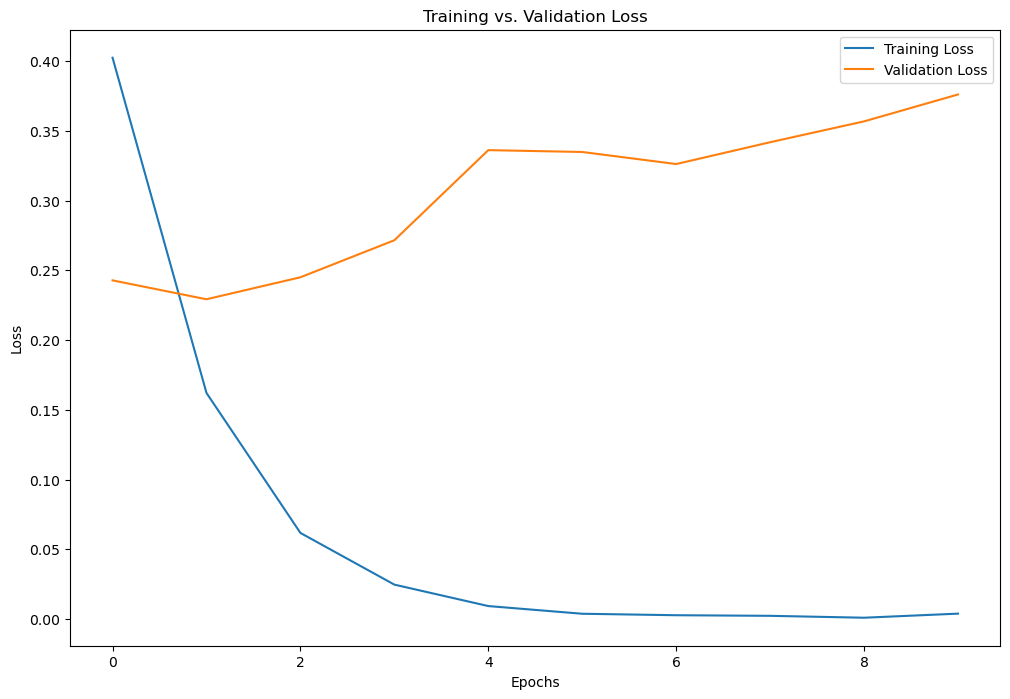

<Figure size 640x480 with 0 Axes>

In [205]:
# Hyperparameters
learning_rate = 0.0005
num_epochs = 12
lr_dacay_epochs = 2

# Initialize lists to store loss values during training and validation
train_losses = []
vali_losses = []

# Early stopping parameters
best_val_loss = float('inf')
early_stopping_patience = 8
early_stopping_counter = 0

for epoch in range(num_epochs):
    if (epoch+1) % lr_dacay_epochs == 0:
        learning_rate = learning_rate * 0.1

    # Training phase
    model_sml.train()
    train_losses_epoch = []
    for i, (data, label, _) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training')):
        data = data.to(device)
        label = label.to(device)
        scores = model_sml(data)
        loss = criterion_smile(scores, label)
        train_losses_epoch.append(loss.item())
        optimizer_sml.zero_grad()
        loss.backward()
        optimizer_sml.step()
    train_losses.append(sum(train_losses_epoch) / len(train_losses_epoch))

    # Validation phase
    model_sml.eval()
    vali_losses_epoch = []
    for i, (data, label, _) in enumerate(tqdm(vali_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation')):
        with torch.no_grad():
            data = data.to(device)
            label = label.to(device)
            scores = model_sml(data)
            loss = criterion_smile(scores, label)
            vali_losses_epoch.append(loss.item())
    vali_losses.append(sum(vali_losses_epoch) / len(vali_losses_epoch))

    # Check for improvement
    avg_val_loss = vali_losses[-1]
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model_sml.state_dict(), 'best_model_smile.pth')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Print average losses for the epoch
    print(f'Epoch {epoch+1}/{num_epochs} - Training Loss: {train_losses[-1]}, Validation Loss: {vali_losses[-1]}\n')


# Check accuracy
model_sml.load_state_dict(torch.load('best_model_smile.pth'))
model_sml.to(device)
check_accuracy(train_loader, model_sml)
check_accuracy(test_loader, model_sml)
plot_loss(train_losses=train_losses, vali_losses=vali_losses)



### For **pose estimation** task, **training and validation**: 

Epoch 1/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.10it/s]


Epoch 1/30 - Training Loss: 0.09471305729226863, Validation Loss: 0.03437330573797226



Epoch 2/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 2/30 - Training Loss: 0.053957226587102766, Validation Loss: 0.025705965235829353



Epoch 3/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.18it/s]


Epoch 3/30 - Training Loss: 0.04234362694811314, Validation Loss: 0.02164349053055048



Epoch 4/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.16it/s]


Epoch 4/30 - Training Loss: 0.035660628586056384, Validation Loss: 0.02042465121485293



Epoch 5/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 5/30 - Training Loss: 0.0325913769688378, Validation Loss: 0.01692811748944223



Epoch 6/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.19it/s]


Epoch 6/30 - Training Loss: 0.028215909535263446, Validation Loss: 0.016151453484781086



Epoch 7/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.17it/s]


Epoch 7/30 - Training Loss: 0.025451865324631652, Validation Loss: 0.013890946400351822



Epoch 8/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.25it/s]


Epoch 8/30 - Training Loss: 0.023017714275641643, Validation Loss: 0.012852256069891155



Epoch 9/30 - Validation: 100%|█████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.18it/s]


Epoch 9/30 - Training Loss: 0.021051971360724023, Validation Loss: 0.013190379831939936



Epoch 10/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.24it/s]


Epoch 10/30 - Training Loss: 0.018748765197047528, Validation Loss: 0.011645419406704605



Epoch 11/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.17it/s]


Epoch 11/30 - Training Loss: 0.016838282307094717, Validation Loss: 0.01223870413377881



Epoch 12/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.14it/s]


Epoch 12/30 - Training Loss: 0.015481779708507214, Validation Loss: 0.011453680810518563



Epoch 13/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.27it/s]


Epoch 13/30 - Training Loss: 0.013905935306498345, Validation Loss: 0.011152455175761133



Epoch 14/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.09it/s]


Epoch 14/30 - Training Loss: 0.012513244346259757, Validation Loss: 0.010691719595342875



Epoch 15/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 15/30 - Training Loss: 0.011012026901416321, Validation Loss: 0.010521762305870652



Epoch 16/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 16/30 - Training Loss: 0.009897077594824295, Validation Loss: 0.010460659163072705



Epoch 17/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.23it/s]


Epoch 17/30 - Training Loss: 0.008535664518700635, Validation Loss: 0.01001062651630491



Epoch 18/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.19it/s]


Epoch 18/30 - Training Loss: 0.007892855760106381, Validation Loss: 0.010059194057248533



Epoch 19/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.16it/s]


Epoch 19/30 - Training Loss: 0.006645927740696897, Validation Loss: 0.009722571005113423



Epoch 20/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.11it/s]


Epoch 20/30 - Training Loss: 0.006017469464147345, Validation Loss: 0.009814785968046635



Epoch 21/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.30it/s]


Epoch 21/30 - Training Loss: 0.005321143224756134, Validation Loss: 0.010316378204151988



Epoch 22/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.25it/s]


Epoch 22/30 - Training Loss: 0.005040769940836632, Validation Loss: 0.009599187353160232



Epoch 23/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 23/30 - Training Loss: 0.0045642958399146165, Validation Loss: 0.009830328403040767



Epoch 24/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.12it/s]


Epoch 24/30 - Training Loss: 0.004073718042568641, Validation Loss: 0.009774573554750532



Epoch 25/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.29it/s]


Epoch 25/30 - Training Loss: 0.003687652125162013, Validation Loss: 0.009691172279417515



Epoch 26/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 26/30 - Training Loss: 0.0036004026757275806, Validation Loss: 0.009510551113635302



Epoch 27/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.20it/s]


Epoch 27/30 - Training Loss: 0.003171786913608617, Validation Loss: 0.009704334719572216



Epoch 28/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.23it/s]


Epoch 28/30 - Training Loss: 0.0032505306088306167, Validation Loss: 0.00952997658168897



Epoch 29/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.18it/s]


Epoch 29/30 - Training Loss: 0.003070302005421291, Validation Loss: 0.009698247828055173



Epoch 30/30 - Validation: 100%|████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 15.13it/s]


Epoch 30/30 - Training Loss: 0.002478017880422796, Validation Loss: 0.00949838914675638

Checking loss on training data: 


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 47/47 [00:02<00:00, 16.47it/s]


Reached a average loss of 0.0013383240749438605
Checking loss on test data: 


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 16.19it/s]

Reached a average loss of 0.014865058660507203


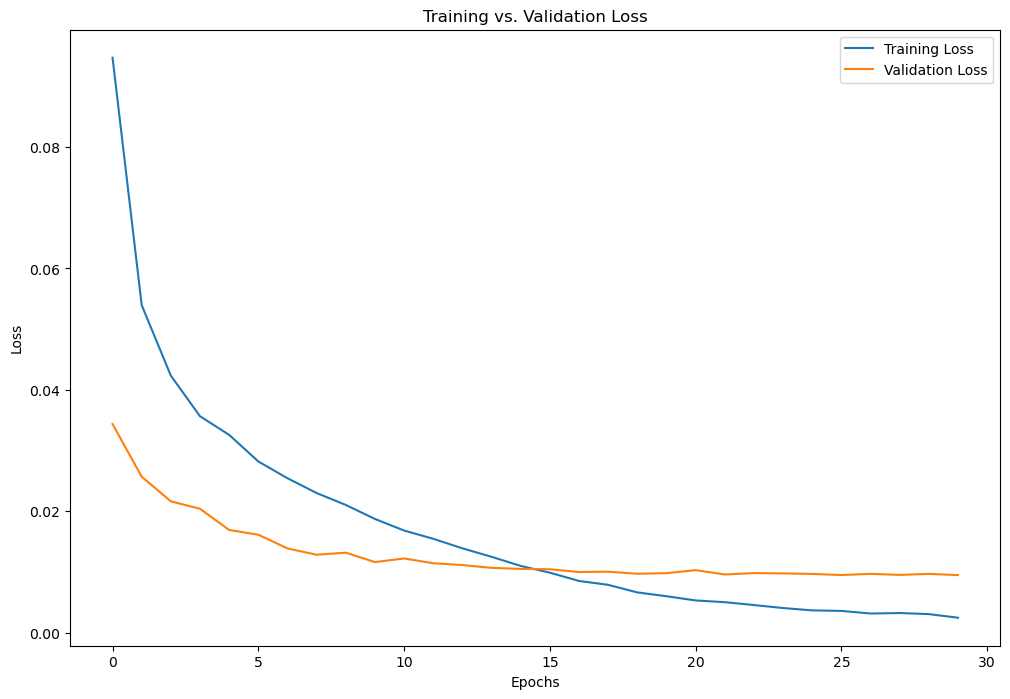

<Figure size 640x480 with 0 Axes>

In [206]:
# Hyperparameters
learning_rate = 0.001
num_epochs = 30
lr_dacay_epochs = 10

# Initialize lists to store loss values during training and validation
train_losses = []
vali_losses = []

# Early stopping parameters
best_val_loss = float('inf')
early_stopping_patience = 8
early_stopping_counter = 0

for epoch in range(num_epochs):
    if (epoch+1) % lr_dacay_epochs == 0:
        learning_rate = learning_rate * 0.1

    # Training phase
    model_pose.train()
    train_losses_epoch = []  # List to store losses for the current epoch
    for i, (data, _, label) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training  ')):
        data = data.to(device)
        label = label.to(device)
        scores = model_pose(data)[:, 0:3]
        loss = criterion_pose(scores, label)
        train_losses_epoch.append(loss.item())
        optimizer_pose.zero_grad()
        loss.backward()
        optimizer_pose.step()
    train_losses.append(sum(train_losses_epoch) / len(train_losses_epoch))  # Append average loss for the epoch

    # Validation phase
    model_pose.eval()
    vali_losses_epoch = []  # List to store validation losses for the current epoch
    for i, (data, _, label) in enumerate(tqdm(vali_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation')):
        with torch.no_grad():
            data = data.to(device)
            label = label.to(device)
            scores = model_pose(data)
            loss = criterion_pose(scores, label)
            vali_losses_epoch.append(loss.item())
    vali_losses.append(sum(vali_losses_epoch) / len(vali_losses_epoch))  # Append average validation loss for the epoch

    # Check for improvement
    avg_val_loss = vali_losses[-1]
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        torch.save(model_pose.state_dict(), 'best_model_pose.pth')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Print average losses for the epoch
    print(f'Epoch {epoch+1}/{num_epochs} - Training Loss: {train_losses[-1]}, Validation Loss: {vali_losses[-1]}\n')


# Check accuracy
model_pose.load_state_dict(torch.load('best_model_pose.pth'))
model_pose.to(device)
check_loss(train_loader, model_pose)
check_loss(test_loader, model_pose)
plot_loss(train_losses=train_losses, vali_losses=vali_losses)

### For the Experimental Results

#### Smile Detection:
- **Training Duration**: 
  - Training stopped after 16 epochs due to early stopping mechanism.
- **Accuracy**:
  - Training Set: 98.00%
  - Test Set: 91.00%
- **Validation Trend**: 
  - The overall validation loss shows a trend of first decreasing and then increasing, aligning with common trends in validation loss.
- **Analysis**:
  - The best model was found in the second epoch, which shows that the parameters of the pre-trained model can already extract features related to smiles well. 
  - Too much training will lead to model overfitting, and it also proves the effectiveness of transfer learning.

#### Pose Estimation:
- **Training Duration**: 
  - Completed 30 epochs.
- **Loss**:
  - Training Set: 0.00134
  - Test Set: 0.01487
- **Validation Trend**:  
  - The overall validation loss shows a trend of consistent decrease with no signs of increase.  
- **Analysis**:  
  - This also shows that the pre-trained model parameters are unfamiliar to extracting pose information, and more training is needed to achieve better results.  
  - We believe this is caused by the fact that the data set used for pre-training does not contain pose information.  


#### This is a funny component, which allows you to test the model by feeding only one image

Image Index: 1220
Predicted Smile: 1
True Smile: 1
Predicted Pose: [[-0.15406087  0.03901111  0.01029805]]
True Pose: tensor([-0.1370,  0.0096,  0.0624])
Pose Loss: 0.0012909763026982546


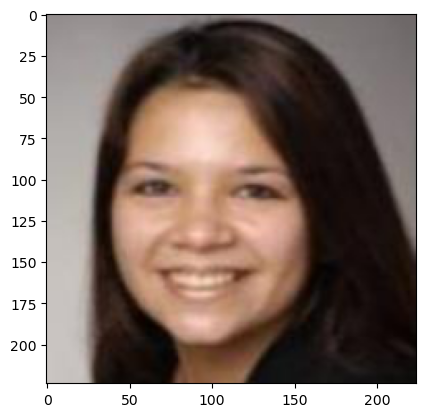

In [207]:
def predict_and_show(index, model_sml, model_pose, dataset, criterion_pose, device):
    # 加载图片和标签
    image, true_smile, true_pose = dataset[index]

    # 将图像和真实姿态标签移动到模型所在的设备上
    image_tensor = image.unsqueeze(0).to(device)
    true_pose = true_pose.to(device)

    # 使用模型进行笑容和姿态的预测
    model_sml.eval()
    model_pose.eval()
    with torch.no_grad():
        predicted_smile = model_sml(image_tensor)
        predicted_pose = model_pose(image_tensor)

    # 将输出转换为预测标签（对于笑容）
    _, predicted_smile_label = torch.max(predicted_smile, 1)

    # 计算姿态预测的损失
    loss_pose = criterion_pose(predicted_pose, true_pose.unsqueeze(0))

    # 将图像张量转换为可显示的格式
    image_show = transforms.ToPILImage()(image)

    # 显示结果
    print("Image Index:", index)
    print("Predicted Smile:", predicted_smile_label.item())
    print("True Smile:", true_smile)
    print("Predicted Pose:", predicted_pose.cpu().numpy())
    print("True Pose:", true_pose.cpu())
    print("Pose Loss:", loss_pose.item())

    # 显示图像
    plt.imshow(image_show)
    plt.show()

# Use example
# You can change the index from 0 to 3999, 
# to visualize the image and check the output of the neural network
predict_and_show(1220, model_sml, model_pose, dataset, criterion_pose, device)


# 9 Conclusions

### Conclusion

#### Smile Detection:
- The experiment on smile detection achieved high accuracy, with the best model showing impressive performance early in the training process. This underscores the efficacy of transfer learning, where the pre-trained model quickly adapted to the smile detection task, demonstrating its ability to extract relevant features with minimal additional training.
- The observation of the validation loss trend (initial decrease followed by an increase) indicates that the model began to overfit after a certain point. This was effectively mitigated by the early stopping mechanism, preventing the model from learning the noise and peculiarities in the training data, thus maintaining a good balance between bias and variance.

#### Pose Estimation:
- The continuous decrease in validation loss throughout the 30 epochs in the pose estimation task suggests that the model was learning effectively without overfitting. This indicates that the task was more challenging, requiring more extensive training for the pre-trained model to adapt to the new data.
- The lack of familiarity of the pre-trained model with pose-related features suggests that the original dataset used for pre-training was not adequately representative of pose information. This highlights the importance of relevant pre-training data in transfer learning and the need for extended training when adapting to significantly different tasks.

#### General Observations:
- These experiments demonstrate the power and efficiency of transfer learning, especially when the pre-trained models have some level of relevance to the new tasks.
- Early stopping proved to be an effective strategy in preventing overfitting, especially in scenarios where the model quickly adapts to the task.
- The results also emphasize the need for careful consideration of the pre-training dataset and its alignment with the target task, as this can significantly impact the amount of additional training required.

#### Future Directions:
- Further exploration into different pre-training datasets and their impact on various tasks would be beneficial.
- Investigating other strategies for preventing overfitting, especially in cases where the validation loss trend is less clear, could also be valuable.
- Experimenting with different architectures or more advanced transfer learning techniques could offer insights into optimizing model performance for specific tasks.